In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
absorb = pd.read_csv("input/coefficients.csv")
absorb.head()

,Unnamed: 0,wavelength,oxy,deoxy,water,fat,collagen,mel,musp
0,0,650,1.9706,20.081,0.003200,0.00471,0.07520,283.49,22.209
1,1,651,1.9406,19.794,0.003238,0.00472,0.07405,282.04,22.132
2,2,652,1.9106,19.506,0.003276,0.00467,0.07290,280.61,22.055
3,3,653,1.8806,19.218,0.003314,0.00464,0.07175,279.18,21.978
4,4,654,1.8506,18.930,0.003352,0.00457,0.07060,277.76,21.902


In [3]:
ratio = pd.read_csv("output/result/portion.csv")
ratio = ratio.set_index("wavelength")
ratio.head()

,cca,fat,ijv,muscle,sds,skin
wavelength,,,,,,
650,0.776493,0.590148,0.776493,20.442406,20.0,0.978255
650,0.575816,0.653309,0.575816,25.490484,24.0,1.078279
650,0.473978,0.699738,0.473978,29.423231,28.0,1.163032
660,0.870382,0.673725,0.870382,23.620455,20.0,1.109716
660,0.670210,0.747297,0.670210,29.070045,24.0,1.227149


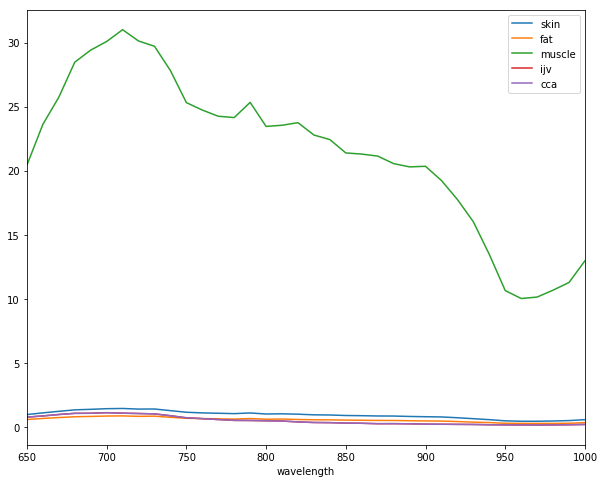

In [4]:
ratio[ratio["sds"]==20][["skin", "fat", "muscle", "ijv", "cca"]].plot(figsize=(10, 8))

# 肌肉(muscle)

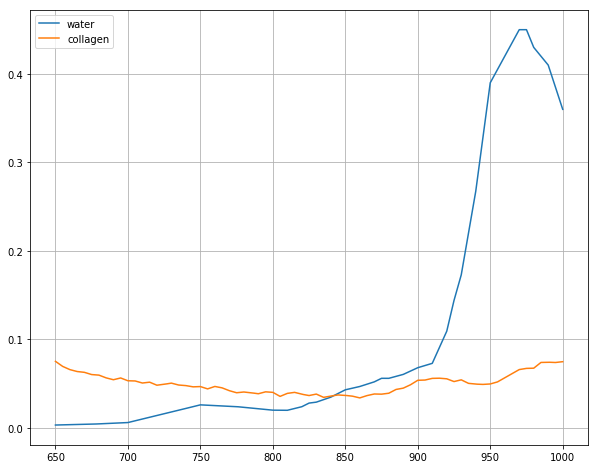

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(absorb["wavelength"], absorb["water"], label="water")
plt.plot(absorb["wavelength"], absorb["collagen"], label="collagen")
plt.grid()
plt.legend()

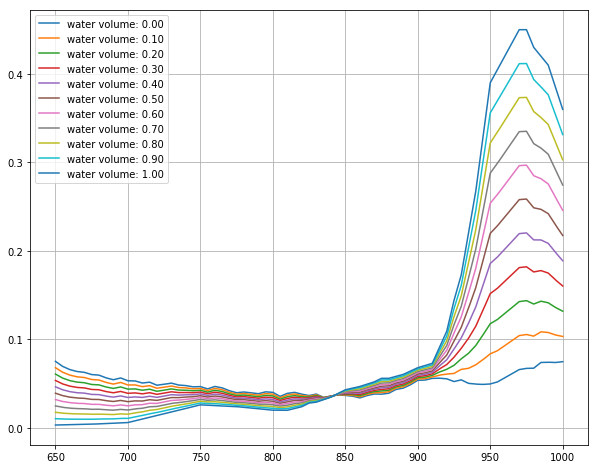

In [6]:
w = 0.75
plt.figure(figsize=(10, 8))
for w in np.arange(0, 1.1, 0.1):
    muscle = w * absorb["water"] + (1-w) * absorb["collagen"]
    plt.plot(absorb["wavelength"], muscle, label="water volume: %.2f" % w)
    plt.legend()
plt.grid()
plt.show()

# 皮膚(skin)

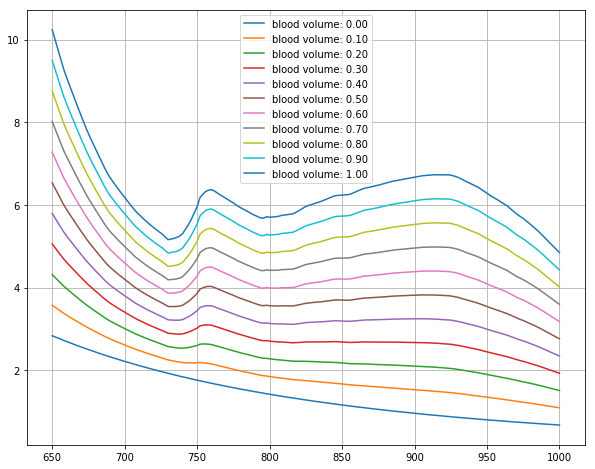

In [7]:
b = 0.5
s = 0.7
m = 0.01
plt.figure(figsize=(10, 8))
for b in np.arange(0, 1.1, 0.1):
    skin = b*(s*absorb["oxy"] + (1-s)*absorb["deoxy"]) + m * absorb["mel"]
    plt.plot(absorb["wavelength"], skin, label="blood volume: %.2f" % b)
plt.legend()
plt.grid()
plt.show()

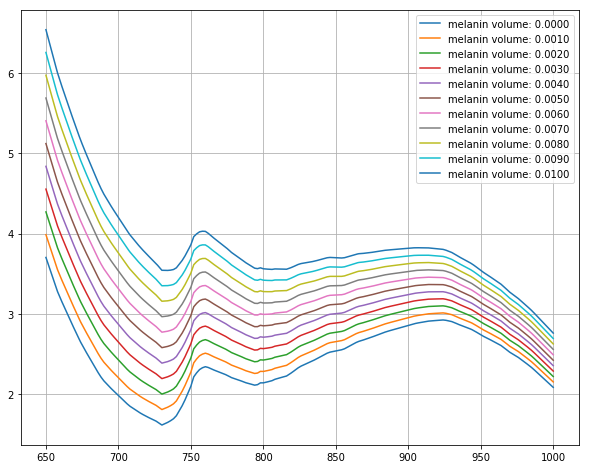

In [8]:
b = 0.5
s = 0.7
m = 0.01
plt.figure(figsize=(10, 8))
for m in np.arange(0, 0.011, 0.001):
    skin = b*(s*absorb["oxy"] + (1-s)*absorb["deoxy"]) + m * absorb["mel"]
    plt.plot(absorb["wavelength"], skin, label="melanin volume: %.4f" % m)
plt.legend()
plt.grid()
plt.show()

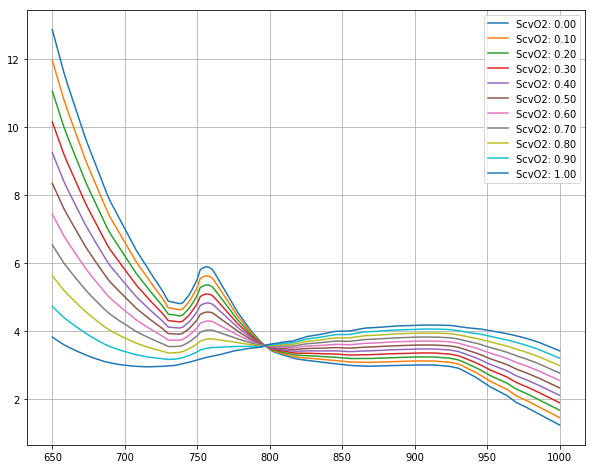

In [9]:
b = 0.5
s = 0.7
m = 0.01
plt.figure(figsize=(10, 8))
for s in np.arange(0, 1.1, 0.1):
    skin = b*(s*absorb["oxy"] + (1-s)*absorb["deoxy"]) + m * absorb["mel"]
    plt.plot(absorb["wavelength"], skin, label="ScvO2: %.2f" % s)
plt.legend()
plt.grid()
plt.show()

# 脂肪層(fat)

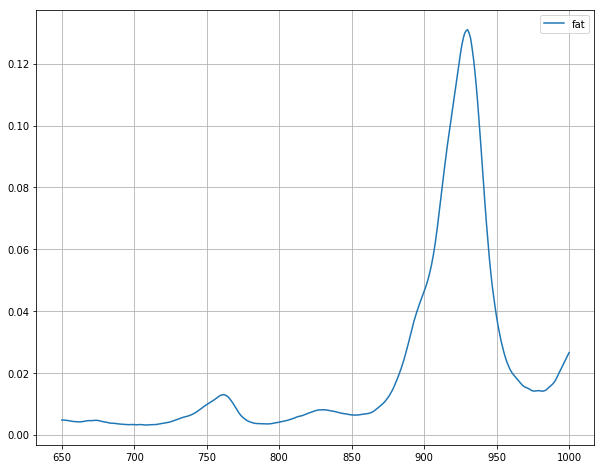

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(absorb["wavelength"], absorb["fat"], label="fat")
plt.grid()
plt.legend()

# 各層吸收比較(值)

In [11]:
b = 0.5
s = 0.7
m = 0.01
w = 0.75
skin = b*(s*absorb["oxy"] + (1-s)*absorb["deoxy"]) + m * absorb["mel"]
muscle = w * absorb["water"] + (1-w) * absorb["collagen"]
fat = absorb["fat"]


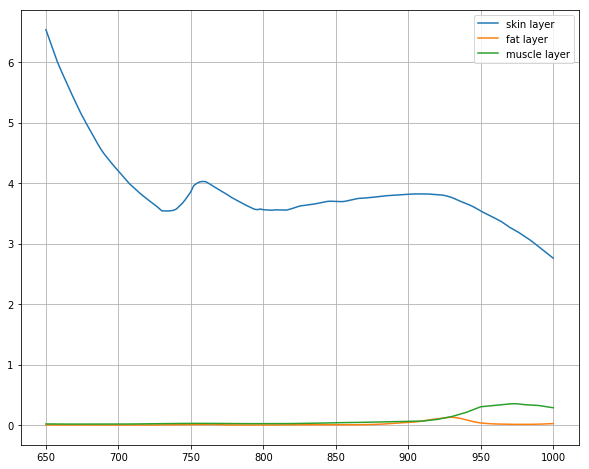

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(absorb["wavelength"], skin, label="skin layer")
plt.plot(absorb["wavelength"], fat, label="fat layer")
plt.plot(absorb["wavelength"], muscle, label="muscle layer")
plt.legend()
plt.grid()
plt.show()

## Note
- 皮膚所佔的吸收最高
- 肌肉佔光子路徑權重最高
---
## 比較光譜
- 700nm以下
- 740nm吸收要高
- 750-760nm吸收要要低
---
## 結論
- 肌肉$water volume\uparrow$
- 皮膚$S_{CV}O_2\downarrow$